<a href="https://colab.research.google.com/github/lucianogaldino/Projeto-Machine-Learning-Rigidez/blob/master/rigidez4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da rigidez de uma mola helicoidal**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
import seaborn as sns

## Análise dos Dados

In [ ]:
rigidez = pd.read_csv('mola.csv')

In [ ]:
type(rigidez)

pandas.core.frame.DataFrame

In [ ]:
rigidez.shape

(26, 6)

In [ ]:
rigidez.head(26)

,cargas,forca,Lo,L,x,K
0,1,0.10,27,29.90,0.00290,34.48
1,2,0.15,27,31.30,0.00430,34.88
2,3,0.23,27,34.00,0.00700,32.86
3,4,0.45,27,41.40,0.01440,31.25
4,5,0.55,27,44.20,0.01720,31.98
5,6,0.68,27,47.20,0.02020,33.66
6,7,0.72,27,50.00,0.02300,31.30
7,8,0.83,27,51.90,0.02490,33.33
8,9,1.05,27,58.00,0.03100,33.87
9,10,1.15,27,61.20,0.03420,33.63


## Organização dos Dados 

In [ ]:
rigidez2=rigidez.drop('cargas', axis=1)

In [ ]:
rigidez2=rigidez2.drop('Lo',axis=1)

In [ ]:
rigidez2.head(26)

,forca,L,x,K
0,0.10,29.90,0.00290,34.48
1,0.15,31.30,0.00430,34.88
2,0.23,34.00,0.00700,32.86
3,0.45,41.40,0.01440,31.25
4,0.55,44.20,0.01720,31.98
5,0.68,47.20,0.02020,33.66
6,0.72,50.00,0.02300,31.30
7,0.83,51.90,0.02490,33.33
8,1.05,58.00,0.03100,33.87
9,1.15,61.20,0.03420,33.63


In [ ]:
rigidez2.dtypes


forca    float64
L        float64
x        float64
K        float64
dtype: object

## Análises estatísticas

In [ ]:
from scipy import stats

In [ ]:
rigidez2.describe()

,forca,L,x,K
count,26.000000,26.000000,26.000000,26.000000
mean,1.491538,74.820769,0.047821,31.764615
std,0.875085,28.719744,0.028720,1.404633
min,0.100000,29.900000,0.002900,29.680000
25%,0.747500,50.475000,0.023475,30.810000
50%,1.450000,72.850000,0.045850,31.300000
75%,2.180000,98.225000,0.071225,32.640000
max,3.000000,124.500000,0.097500,34.880000


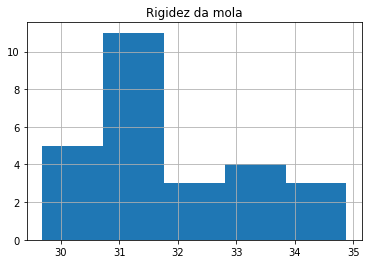

In [ ]:
rigidez2.K.hist(bins=5)
plt.title('Rigidez da mola')
plt.show()

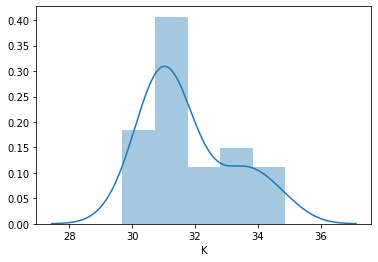

In [ ]:
sns.distplot(rigidez2['K'])

In [ ]:
import plotly.express as px

fig = px.box(rigidez2, y='K')
fig.update_layout( width=600,height=600)
fig.show()

## Correlações

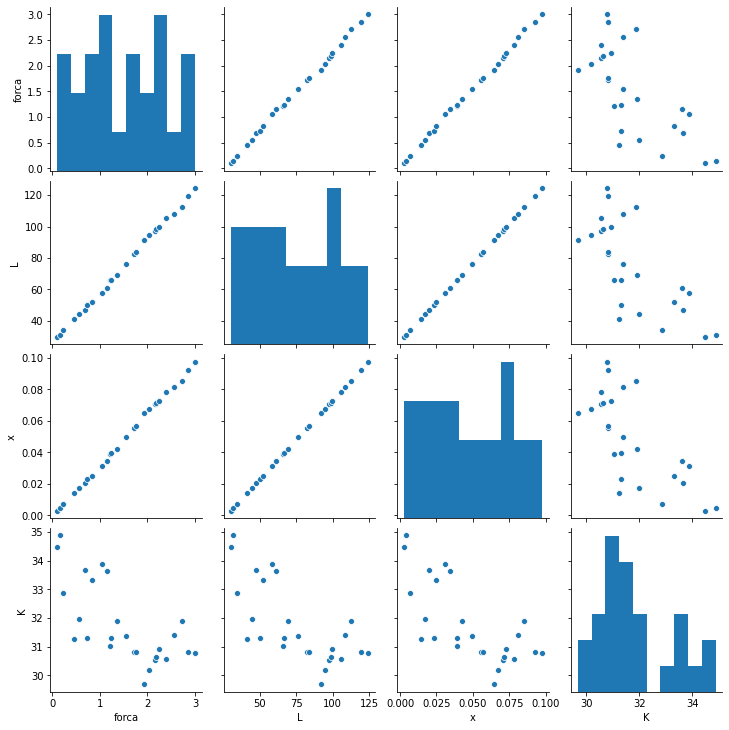

In [ ]:
sns.pairplot(rigidez2)

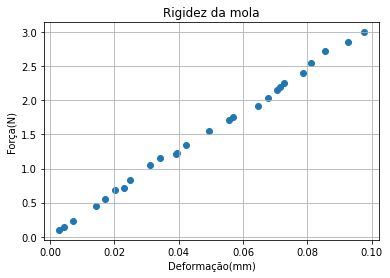

In [ ]:
plt.scatter(rigidez2.x,rigidez2.forca)
plt.xlabel('Deformação(mm)')
plt.ylabel('Força(N)')
plt.title('Rigidez da mola')
plt.grid(True)
plt.show()


In [ ]:
correlacoes = rigidez2.corr()

In [ ]:
correlacoes

,forca,L,x,K
forca,1.000000,0.999015,0.999015,-0.685569
L,0.999015,1.000000,1.000000,-0.708066
x,0.999015,1.000000,1.000000,-0.708066
K,-0.685569,-0.708066,-0.708066,1.000000


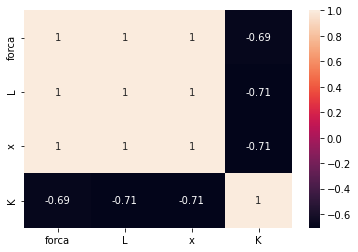

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True)

## MACHINE LEARNING

## REGRESSÃO LINEAR

In [ ]:
x = rigidez2.iloc[:, 2].values
y = rigidez2.iloc[:, 0].values

In [ ]:
x = x.reshape(-1,1) #transformando em matriz

In [ ]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

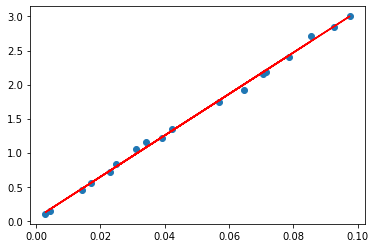

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_treinamento, y_treinamento) #Gráfico com dados de treinamento.
plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'red')

In [ ]:
previsoes = regressor.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

In [ ]:
mae

0.02163541866533639

In [ ]:
mse

0.0007812163996530357

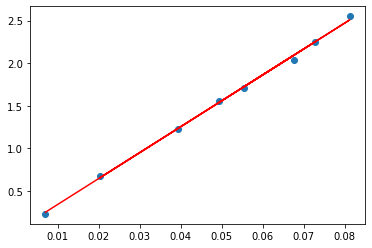

In [ ]:
plt.scatter(x_teste, y_teste) #Gráfico com os dados de teste
plt.plot(x_teste, regressor.predict(x_teste), color = 'red')

In [ ]:
regressor.score(x_teste, y_teste)

0.9985646660242469

In [ ]:
previsao = regressor.predict(np.array(0.08).reshape(1, -1))

In [ ]:
previsao

array([2.47103841])

In [ ]:
# coeficiente linear (ideal é resultar zero nesse caso)
regressor.intercept_

0.037023293295982196

In [ ]:
# coeficiente angular (Rigidez ou constante elástica da mola)
regressor.coef_

array([30.42518899])

Portanto, rigidez = regressor.coef_ = 30,4252 N/m

Equação para o cálculo de previsão da força:

F = regressor.intercept + regressor.coef_*regressor.predict()

F = regressor.intercept + K * x

F = 0.037023 + 30.42519 * x 

## ÁRVORE DE DECISÃO

In [ ]:
x = rigidez2.iloc[:, 1:4].values
y = rigidez2.iloc[:, 0].values

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

In [ ]:
previsoes = regressor.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_teste, previsoes)

0.08749999999999997

In [ ]:
mean_squared_error(y_teste, previsoes)

0.011024999999999991

In [ ]:
regressor.score(x_teste, y_teste)

0.9797436957420422

In [ ]:
previsao = regressor.predict(np.array(0.08).reshape(1, -1))

In [ ]:
previsao

array([2.4])

Resultados comparativos dos scores:

Regressão linear: 0.9985646660242469

Árvore de decisão: 0.9797436957420422

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)


In [ ]:
previsoes = regressor.predict(x_teste)

In [ ]:
mean_absolute_error(y_teste, previsoes)

0.054712500000000344

In [ ]:
mean_squared_error(y_teste, previsoes)

0.0042836262499999864

In [ ]:
regressor.score(x_teste, y_teste)

0.9921296656102154

In [ ]:
previsao = regressor.predict(np.array(0.08).reshape(1, -1))

In [ ]:
previsao

array([2.4493])

Resultados comparativos dos scores:

Regressão linear: 0.9985646660242469

Árvore de decisão: 0.9797436957420422

Random Forest: 0.9921296656102154

## VETORES DE SUPORTE (SVR)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

In [ ]:
regressor.score(x_teste, y_teste)

0.9964102872302216

In [ ]:
mean_absolute_error(y_teste, previsoes)

0.054712500000000344

In [ ]:
mean_squared_error(y_teste, previsoes)

0.0042836262499999864

In [ ]:
previsao = regressor.predict(np.array(0.08).reshape(1, -1))

In [ ]:
previsao

array([2.46150008])

Resultados comparativos dos scores:

Regressão linear: 0.9985646660242469

Árvore de decisão: 0.9797436957420422

Random Forest: 0.9921296656102154

SVR: 0.9964102872302216

## REDES NEURAIS

O melhor resultado foi sem a base de teste e treinamento, usando os dois atributos principais (força e deformação).

In [ ]:
x = rigidez2.iloc[:, 2:3].values
y = rigidez2.iloc[:, 0:1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
regressor.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
regressor.score(x, y)

0.9954506140541947

In [ ]:
previsao = scaler_y.inverse_transform(regressor.predict(scaler_x.transform(np.array(0.08).reshape(1, -1))))

In [ ]:
previsao

array([2.47451658])

In [ ]:
previsoes = regressor.predict(x_teste)
x_teste = scaler_x.inverse_transform(x_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)

Text(0, 0.5, 'Força (N)')

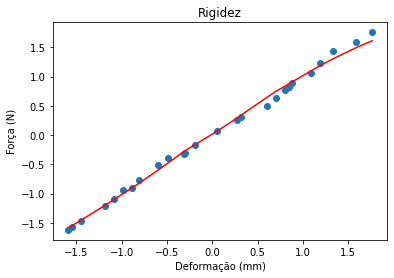

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color = 'red')
plt.title('Rigidez')
plt.xlabel('Deformação (mm)')
plt.ylabel('Força (N)')

Resultados comparativos dos scores:

Regressão linear: 0.9985646660242469

Árvore de decisão: 0.9797436957420422

Random Forest: 0.9921296656102154

SVR: 0.9964102872302216

Redes Neurais: 0.9887326587125854

## CONCLUSÃO:

## O melhor algoritmo, conforme análise dos scores e erros, foi o de regressão linear.